In [1]:
! pip install plotly
! pip install Streamlit
! pip install folium
! pip install fuzzywuzzy
! pip install python-Levenshtein
! pip install pycountry-convert
! pip install streamlit-folium
! pip install branca
! pip install joblib

In [2]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
import os
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

# for diagramming 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as ch

# For serialization and deserialization of data from/to file
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import folium
import statsmodels.api as sm
from scipy.spatial.distance import cdist

In [3]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')

# Correctly constructing the file path
dataset_path = os.path.join('DataSæt', 'global air pollution dataset.csv')
dataset_path2 = os.path.join('DataSæt', '2017_-_Cities_Community_Wide_Emissions.csv')

# Loading the datasets
df = pd.read_csv(dataset_path)
df2 = pd.read_csv(dataset_path2)


In [4]:
# Define the correction mapping with the correct capitalization
correction_mapping = {
    "United States of America": "USA",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Iran (Islamic Republic of)": "Iran",
    "Syrian Arab Republic": "Syria",
    "Republic of Korea": "South Korea",
    "Lao People's Democratic Republic": "Laos",
    # Add other corrections as needed
}

# Apply the correction mapping to df and df2 and overwrite the original 'Country' column
df['Country'] = df['Country'].replace(correction_mapping).str.strip()
df2['Country'] = df2['Country'].replace(correction_mapping).str.strip()

# Proceed with the merge using the corrected country names
df_merged = pd.merge(df, df2, on='Country', how='inner')

# Rename 'City_x' to 'City' and 'Country_x' to 'Country'
df_merged.rename(columns={'City_x': 'City',}, inplace=True)

# Drop the extra 'Country' column
df_merged.drop(columns=['City_y'], inplace=True)

# Rearrange the columns
column_order = ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'Account number', 'Organization', 'Region', 'C40', 'Access', 'Reporting year', 'Accounting year', 'Boundary', 'Protocol', 'Protocol column', 'Gases included', 'Total emissions (metric tonnes CO2e)', 'Total Scope 1 Emissions (metric tonnes CO2e)', 'Total Scope 2 Emissions (metric tonnes CO2e)', 'Comment', 'Increase/Decrease from last year', 'Reason for increase/decrease in emissions', 'Population', 'Population year', 'GDP', 'GDP Currency', 'GDP Year', 'GDP Source', 'Average annual temperature (in Celsius)​', '​Average altitude (m)', '​Land area (in square km)', 'City Location', 'Country Location']
# Reorder the DataFrame columns
df_merged = df_merged[column_order]


In [5]:
df_merged.drop(columns=['Gases included'], inplace=True)
df_merged.drop(columns=['Protocol column'], inplace=True)
df_merged.drop(columns=['Comment'], inplace=True)
df_merged.drop(columns=['Total Scope 1 Emissions (metric tonnes CO2e)'], inplace=True)
df_merged.drop(columns=['Total Scope 2 Emissions (metric tonnes CO2e)'], inplace=True)
df_merged.drop(columns=['Account number'], inplace=True)
df_merged.drop(columns=['Organization'], inplace=True)
df_merged.drop(columns=['Accounting year'], inplace=True)
df_merged.drop(columns=['Boundary'], inplace=True)
df_merged.drop(columns=['Protocol'], inplace=True)
df_merged.drop(columns=['Increase/Decrease from last year'], inplace=True)
df_merged.drop(columns=['Reason for increase/decrease in emissions'], inplace=True)
df_merged.drop(columns=['Population year'], inplace=True)
df_merged.drop(columns=['GDP Currency'], inplace=True)
df_merged.drop(columns=['GDP Source'], inplace=True)
df_merged.drop(columns=['Access'], inplace=True)

In [6]:
# Convert nulls/NaNs to 'False'
df_merged['C40'] = df_merged['C40'].fillna('False')

# Convert any cell that contains "C40" to 'True', assuming "C40" indicates a true condition
# Adjust the condition as needed to match your data's specific representation of true
df_merged['C40'] = df_merged['C40'].apply(lambda x: 'True' if 'C40' in str(x) else 'False')


In [7]:
# Delete the null values from the data frame
df_merged = df_merged.dropna()

In [8]:
# Extracting latitude and longitude from "City Location" and "Country Location" into new columns
df_merged[['City Latitude', 'City Longitude']] = df_merged['City Location'].str.extract(r'\(([^,]+), ([^)]+)\)')
df_merged[['Country Latitude', 'Country Longitude']] = df_merged['Country Location'].str.extract(r'\(([^,]+), ([^)]+)\)')

# Displaying the first few rows to ensure the transformation was successful
df_merged.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,GDP Year,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Location,Country Location,City Latitude,City Longitude,Country Latitude,Country Longitude
1241,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2012.0,26.0,8.0,692.0,"(-12.97304, -38.502304)","(-14.235004, -51.92528)",-12.97304,-38.502304,-14.235004,-51.92528
1242,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2013.0,23.0,5.0,133.1,"(-22.892857, -43.118381)","(-14.235004, -51.92528)",-22.892857,-43.118381,-14.235004,-51.92528
1243,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2013.0,20.0,3.0,438.0,"(-27.5949884, -48.5481743)","(-14.235004, -51.92528)",-27.5949884,-48.5481743,-14.235004,-51.92528
1244,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2014.0,21.0,900.0,331.0,"(-19.916681, -43.934493)","(-14.235004, -51.92528)",-19.916681,-43.934493,-14.235004,-51.92528
1246,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2010.0,23.2,749.0,739.0,"(-16.6868912, -49.2647943)","(-14.235004, -51.92528)",-16.6868912,-49.2647943,-14.235004,-51.92528


In [9]:
# Convert the latitude and longitude columns from strings to floats
df_merged['City Latitude'] = pd.to_numeric(df_merged['City Latitude'], errors='coerce')
df_merged['City Longitude'] = pd.to_numeric(df_merged['City Longitude'], errors='coerce')
df_merged['Country Latitude'] = pd.to_numeric(df_merged['Country Latitude'], errors='coerce')
df_merged['Country Longitude'] = pd.to_numeric(df_merged['Country Longitude'], errors='coerce')

In [10]:
df_merged.drop(columns=['City Location'], inplace=True)
df_merged.drop(columns=['Country Location'], inplace=True)

In [11]:
# Convert 'C40' from strings "True"/"False" to actual booleans
df_merged['C40'] = df_merged['C40'].map({'True': True, 'False': False})

# Create two new columns: 'C40_True' and 'C40_False'
df_merged['C40_True'] = df_merged['C40'].astype(int)  # This will convert True to 1 and False to 0
df_merged['C40_False'] = (~df_merged['C40']).astype(int)  # This inverts the boolean and then converts to 0/1

In [12]:
df_merged.drop(columns=['C40'], inplace=True)

In [13]:
df = df_merged

In [14]:
import pycountry_convert as pc

#applying continent to the dataset for future use of folium mapping
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None  # For countries that don't match

# Apply the conversion function to your DataFrame
df['Continent'] = df['Country'].apply(country_to_continent)
# Filter for other continents
north_american_countries_df = df[df['Continent'] == 'North America']
south_american_countries_df = df[df['Continent'] == 'South America']
asian_countries_df = df[df['Continent'] == 'Asia']
african_countries_df = df[df['Continent'] == 'Africa']
oceania_countries_df = df[df['Continent'] == 'Oceania']
Europe_df = df[df['Continent'] == 'Europe']

/Users/x-drive/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Users/x-drive/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [15]:
df = df.drop_duplicates(subset=['City'])


In [16]:
df.count()

Country                                     13408
City                                        13408
AQI Value                                   13408
AQI Category                                13408
CO AQI Value                                13408
CO AQI Category                             13408
Ozone AQI Value                             13408
Ozone AQI Category                          13408
NO2 AQI Value                               13408
NO2 AQI Category                            13408
PM2.5 AQI Value                             13408
PM2.5 AQI Category                          13408
Region                                      13408
Reporting year                              13408
Total emissions (metric tonnes CO2e)        13408
Population                                  13408
GDP                                         13408
GDP Year                                    13408
Average annual temperature (in Celsius)​    13408
​Average altitude (m)                       13408


In [17]:
df.to_pickle("dataframe.pkl") # save df to a pickle file so it can be used for streamlit

<Figure size 1000x600 with 0 Axes>

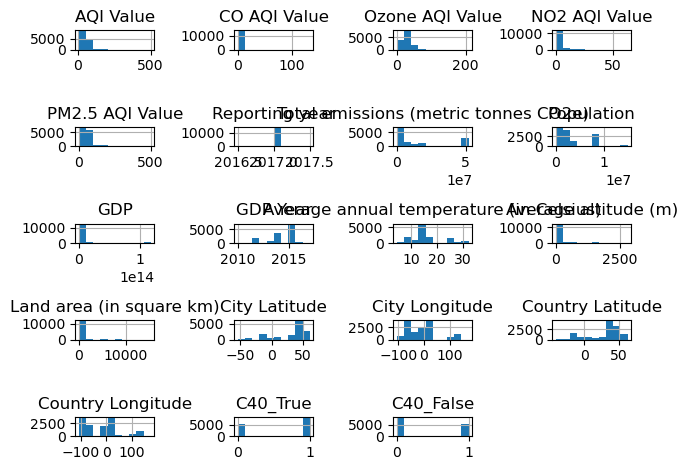

In [18]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

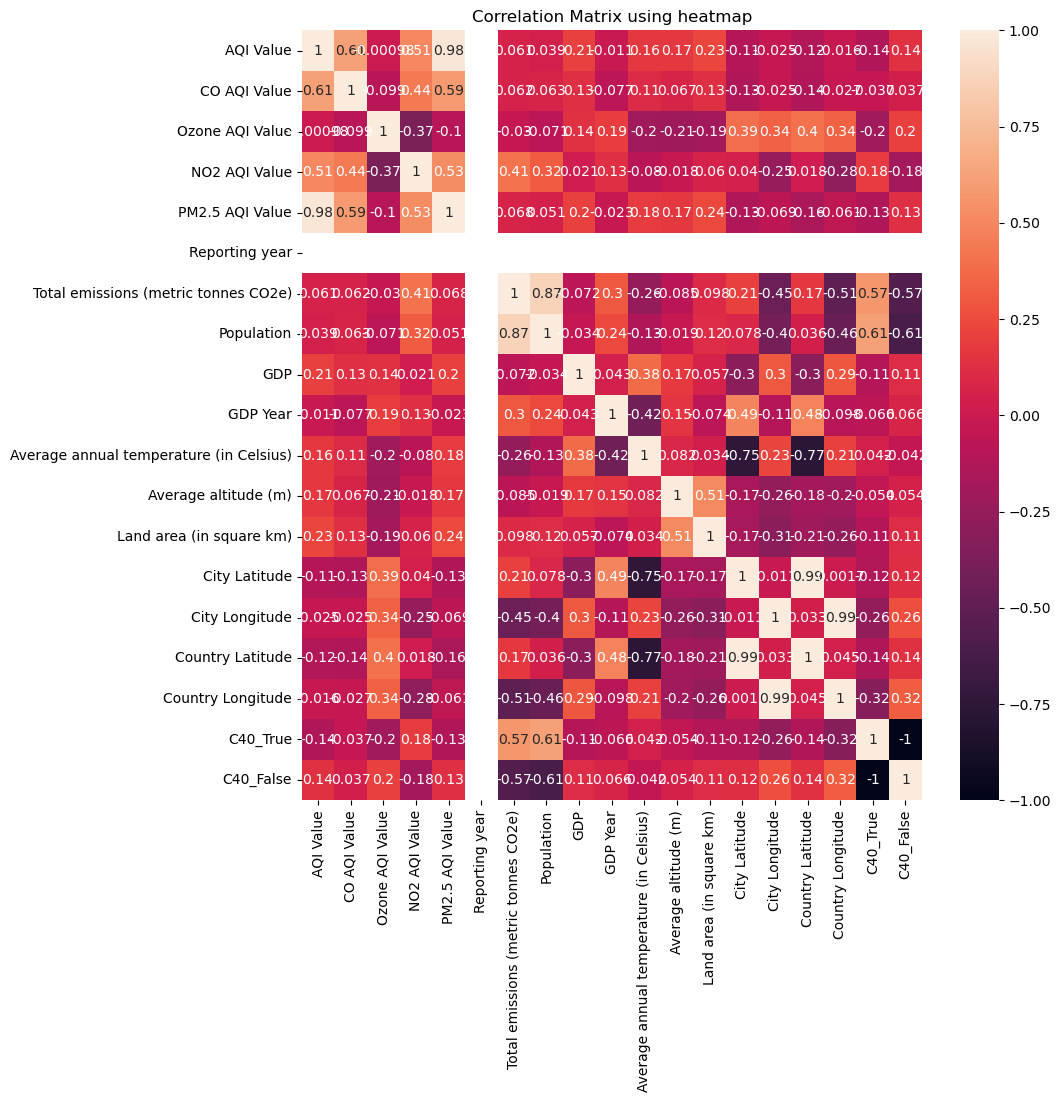

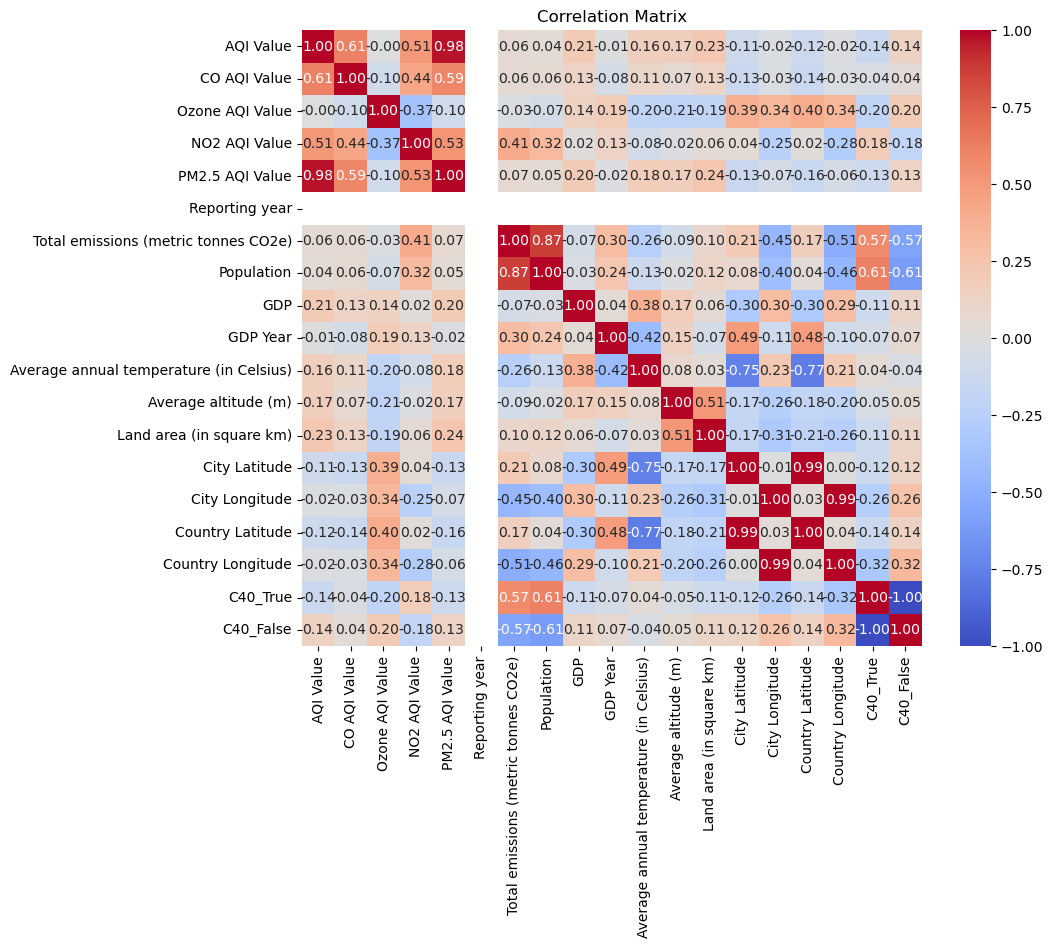

In [95]:
# The purpose of this 2 models is to analyze the relationships between different numerical variables in the dataset.

# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Visualizing the correlation matrix using a heatmap to understand the relationships between different variables.
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix using heatmap')
sns.heatmap(corr_matrix, annot=True)




/Users/x-drive/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      City Latitude  City Longitude
1241      -12.97304      -38.502304
1255      -12.97304      -38.502304
1269      -12.97304      -38.502304
1283      -12.97304      -38.502304
1297      -12.97304      -38.502304
K-means score: 3416416.378232006


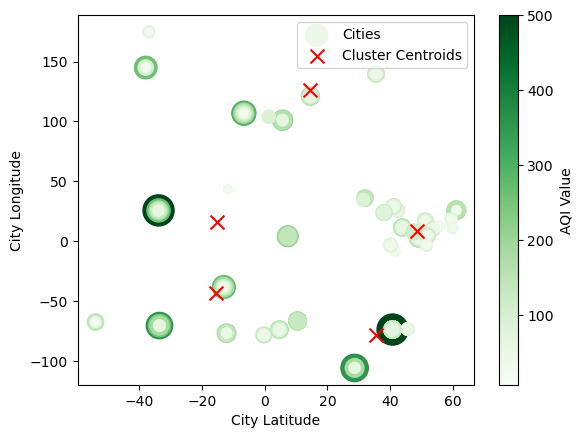

In [87]:
# Analysis of air quality in C40 cities using K-means clustering

# create a Python list of feature names
feature_cols = ['City Latitude', 'City Longitude']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# Train K-means model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X)

# Get inertia score
kmeans_score = kmeans.inertia_

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the first 5 rows
print(X.head())

# Print K-means score
print("K-means score:", kmeans_score)

# Plot city points
plt.xlabel('City Latitude')
plt.ylabel('City Longitude')
plt.scatter(df['City Latitude'], df['City Longitude'], c=df['AQI Value'], s=df['AQI Value'], cmap='Greens', label='Cities')
plt.colorbar(label='AQI Value')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Cluster Centroids')

# Show legend
plt.legend()

# Show plot
plt.show()


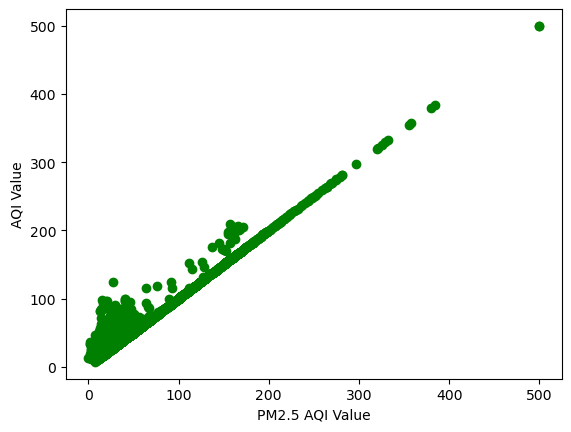

In [85]:
# Overall, this scatterplot provides a visual representation of the relationship between PM2.5 levels and overall air quality (AQI), 
# offering insight into how changes in PM2.5 levels impact overall air quality.
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.scatter(df['PM2.5 AQI Value'], df['AQI Value'], color='green')
plt.show()


/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_40044/3510188199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)


<Axes: xlabel='PM2.5 AQI Value', ylabel='Density'>

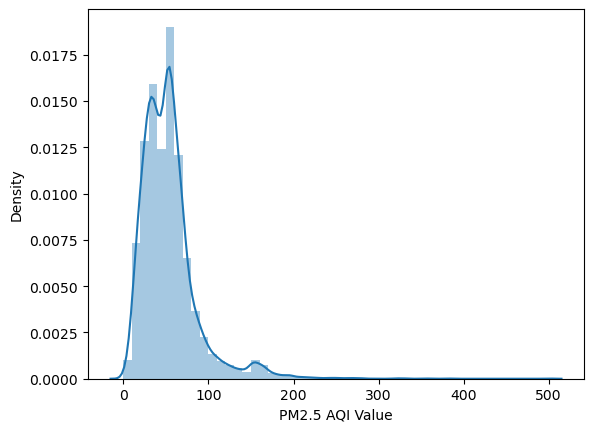

In [22]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_40044/809496334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)


<Axes: xlabel='AQI Value', ylabel='Density'>

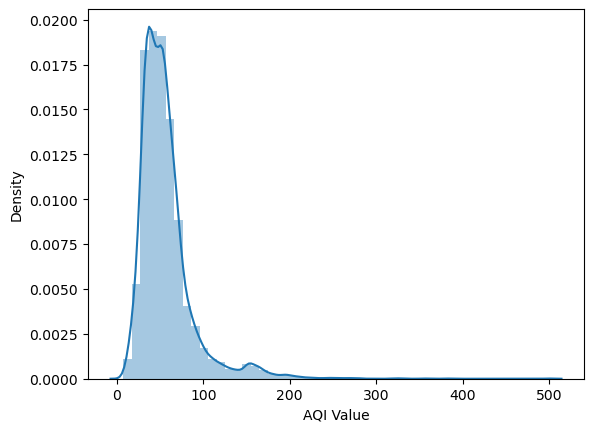

In [23]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)

In [24]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['PM2.5 AQI Value'].values.reshape(-1, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396, 1)
(11396, 1)
(2012, 1)
(2012, 1)


In [27]:
y_test

array([[122],
       [ 45],
       [ 21],
       ...,
       [ 23],
       [ 18],
       [ 15]])

In [28]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [29]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [30]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [31]:
a

array([[1.02746028]])

In [32]:
b

array([-4.51951241])

In [33]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[120.83064118],
       [ 41.71619998],
       [ 57.12810411],
       ...,
       [ 69.45762742],
       [ 13.97477255],
       [ 28.35921641]])

In [34]:
y_test

array([[122],
       [ 45],
       [ 21],
       ...,
       [ 23],
       [ 18],
       [ 15]])

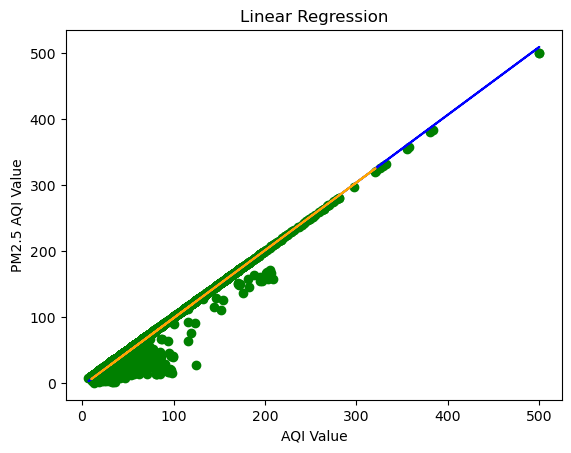

In [35]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

In [36]:
R2 = myreg.score(X, y)
R2

0.952287926993443

In [37]:
X, y = df['PM2.5 AQI Value'], df['AQI Value']

In [38]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [39]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396,)
(11396,)
(2012,)
(2012,)


In [40]:
# randomly selected
y_train

23175      38
30565      51
268333     34
269377     41
275841     69
         ... 
13911      61
149625    150
284972     38
4531       58
288526    163
Name: AQI Value, Length: 11396, dtype: int64

In [41]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [42]:
model

array([0.92831339, 6.80354182])

In [43]:
a, b = model[0], model[1]

In [44]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([0.91818718, 7.32709338])

In [45]:
a1, b1 = test[0], test[1]

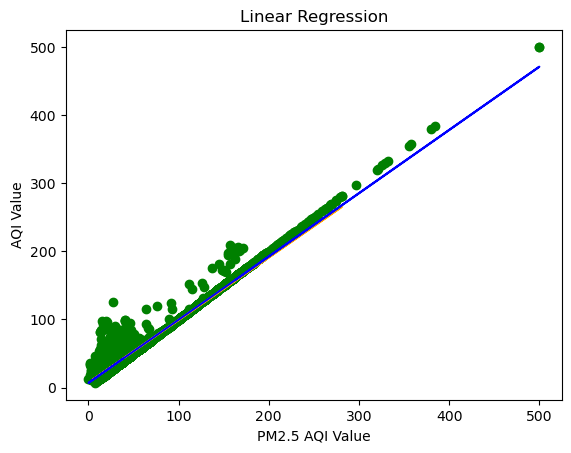

In [46]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.show()

In [47]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[159.87413165]])

In [48]:
price_predict = a*160 + b
price_predict

155.3336834597728

In [49]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[88.97937265]])

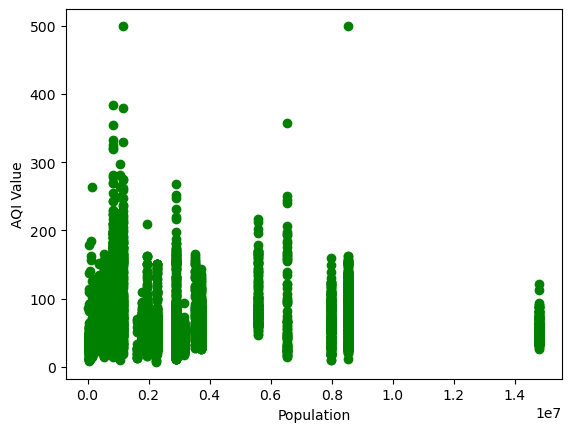

In [50]:
#lets try with something thats not linær obvious
plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.scatter(df['Population'], df['AQI Value'], color='green')
plt.show()

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_40044/3586239839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Population'],  label='Population', norm_hist=True)


<Axes: xlabel='Population', ylabel='Density'>

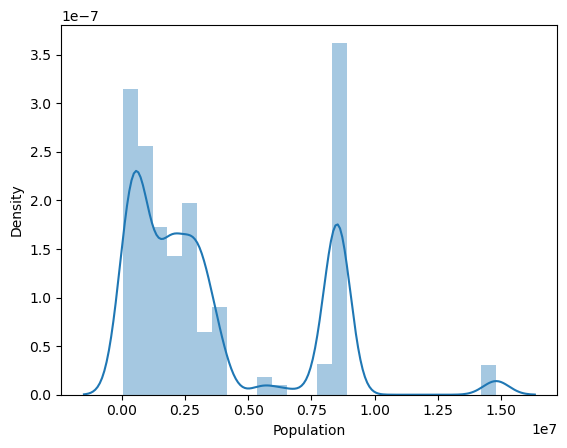

In [51]:
sns.distplot(df['Population'],  label='Population', norm_hist=True)

In [52]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['Population'].values.reshape(-1, 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396, 1)
(11396, 1)
(2012, 1)
(2012, 1)


In [55]:
y_test

array([[2902927],
       [2902927],
       [3731096],
       ...,
       [8537673],
       [1614400],
       [ 354300]])

In [56]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [57]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [58]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [59]:
a

array([[4025.8353809]])

In [60]:
b

array([3303196.21884342])

In [61]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[3794348.13531348],
       [3484358.81098401],
       [3544746.34169755],
       ...,
       [3593056.36626837],
       [3375661.25569966],
       [3432022.95103229]])

In [62]:
y_test

array([[2902927],
       [2902927],
       [3731096],
       ...,
       [8537673],
       [1614400],
       [ 354300]])

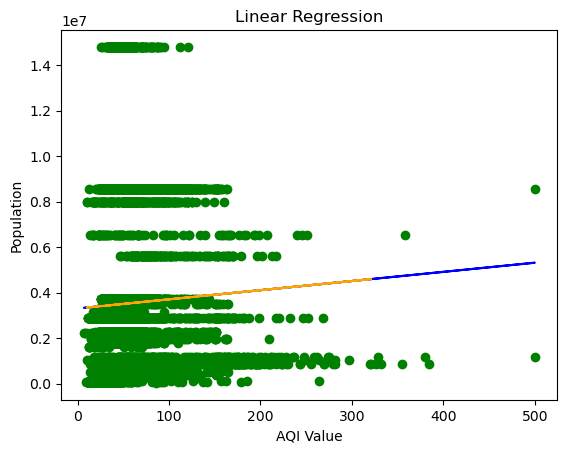

In [63]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('AQI Value')
plt.ylabel('Population')
plt.show()

In [64]:
R2 = myreg.score(X, y)
R2

0.0014905377546974297

In [65]:
X, y = df['PM2.5 AQI Value'], df['AQI Value']

In [66]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [67]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396,)
(11396,)
(2012,)
(2012,)


In [68]:
# randomly selected
y_train

23175      38
30565      51
268333     34
269377     41
275841     69
         ... 
13911      61
149625    150
284972     38
4531       58
288526    163
Name: AQI Value, Length: 11396, dtype: int64

In [69]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [70]:
model

array([0.92831339, 6.80354182])

In [71]:
a, b = model[0], model[1]

In [72]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([0.91818718, 7.32709338])

In [73]:
a1, b1 = test[0], test[1]

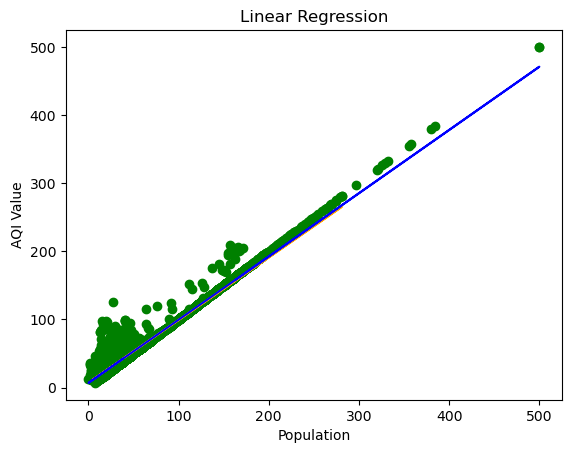

In [74]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.show()

In [75]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[3947329.87978777]])

In [76]:
price_predict = a*160 + b
price_predict

155.3336834597728

In [77]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[3669547.23850552]])